In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
colab_dir = "/content/drive/My Drive/food-safety"
os.chdir(colab_dir)

In [3]:
!pwd

/content/drive/My Drive/food-safety


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=<apikey>)
project = rf.workspace("new-workspace-jmblq").project("food-safety-yziy5")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to food-safety-2 in yolov8:: 100%|██████████| 14348/14348 [01:27<00:00, 163.58it/s]


In [4]:
import glob

In [5]:
from IPython.display import Image,display

In [6]:
from IPython import display

In [7]:
!nvidia-smi

Sat Nov 16 17:48:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   63C    P8              15W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 28.8 MB/s eta 0:00:00


In [9]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.5/235.7 GB disk)


In [14]:
!yolo task=detect mode=train model=yolov8m.pt data="/content/drive/MyDrive/food-safety/food-safety-2/data.yaml" epochs=100 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 257MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/food-safety/food-safety-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

In [16]:
!yolo task=detect mode=train model=/content/drive/MyDrive/food-safety/runs/detect/train/weights/best.pt  resume=True

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/food-safety/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/food-safety/food-safety-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/food-safety/runs/detect/train/weights/best.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

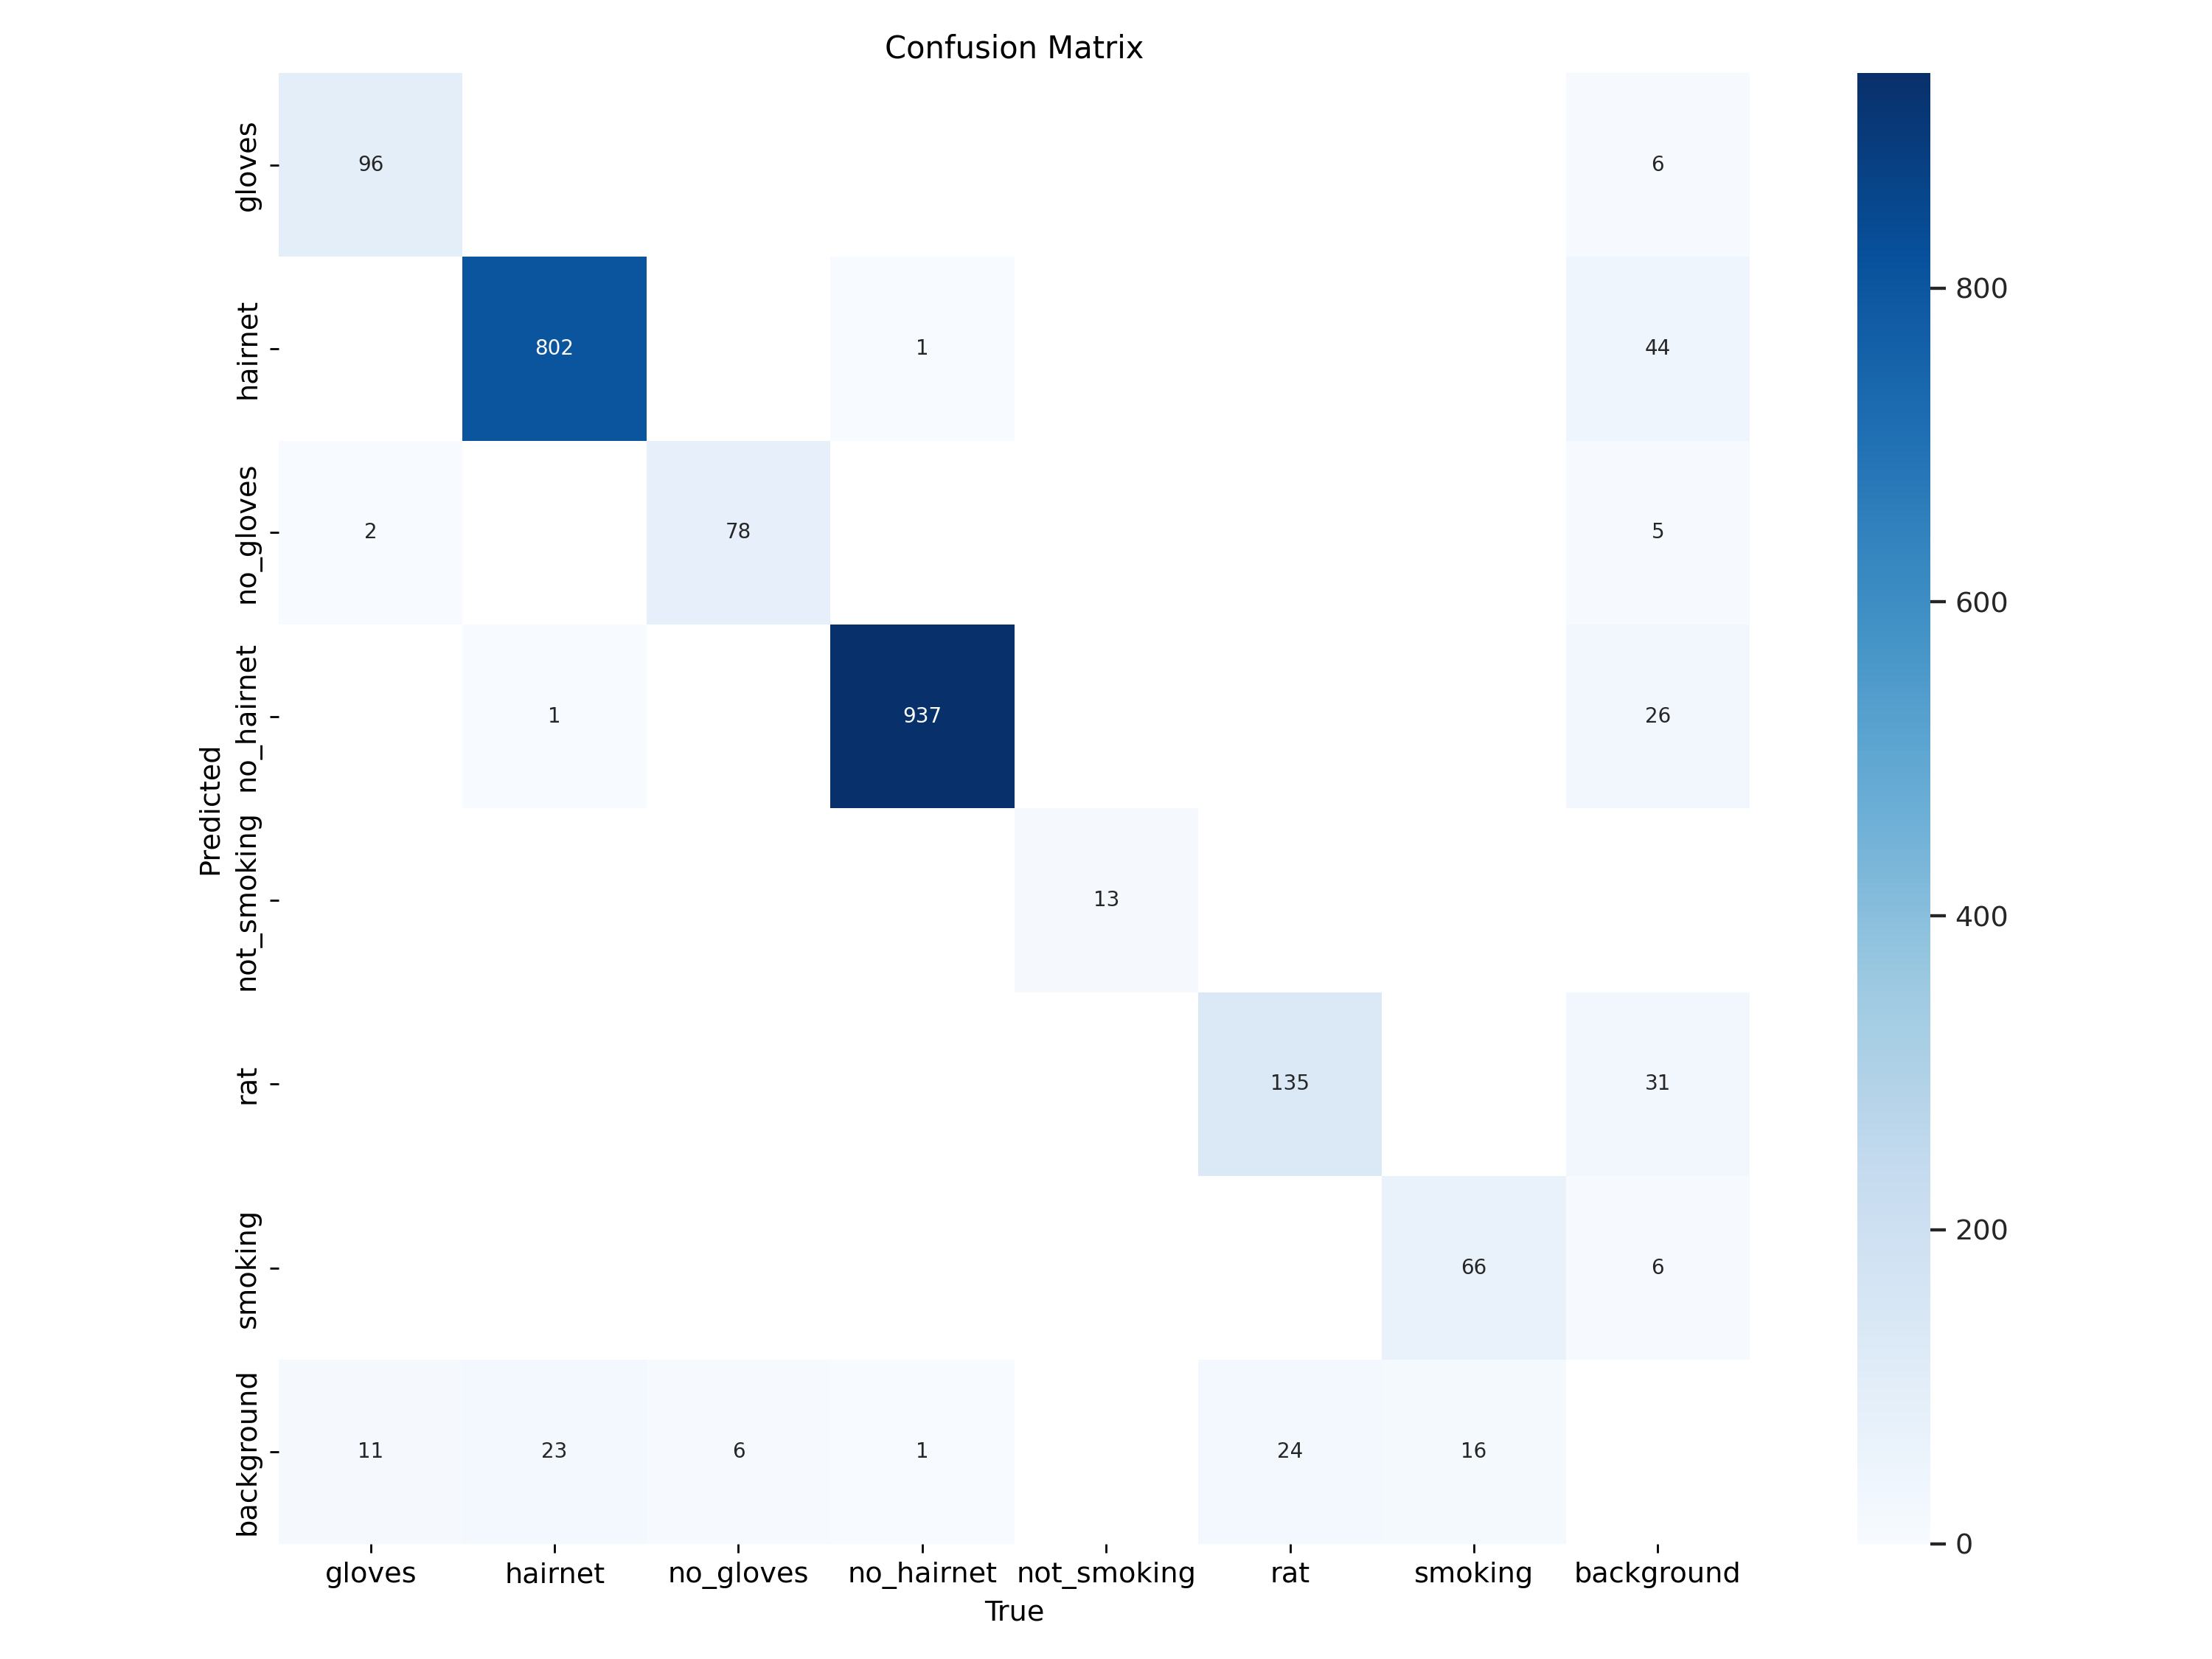

In [17]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/train/confusion_matrix.png",width=800)

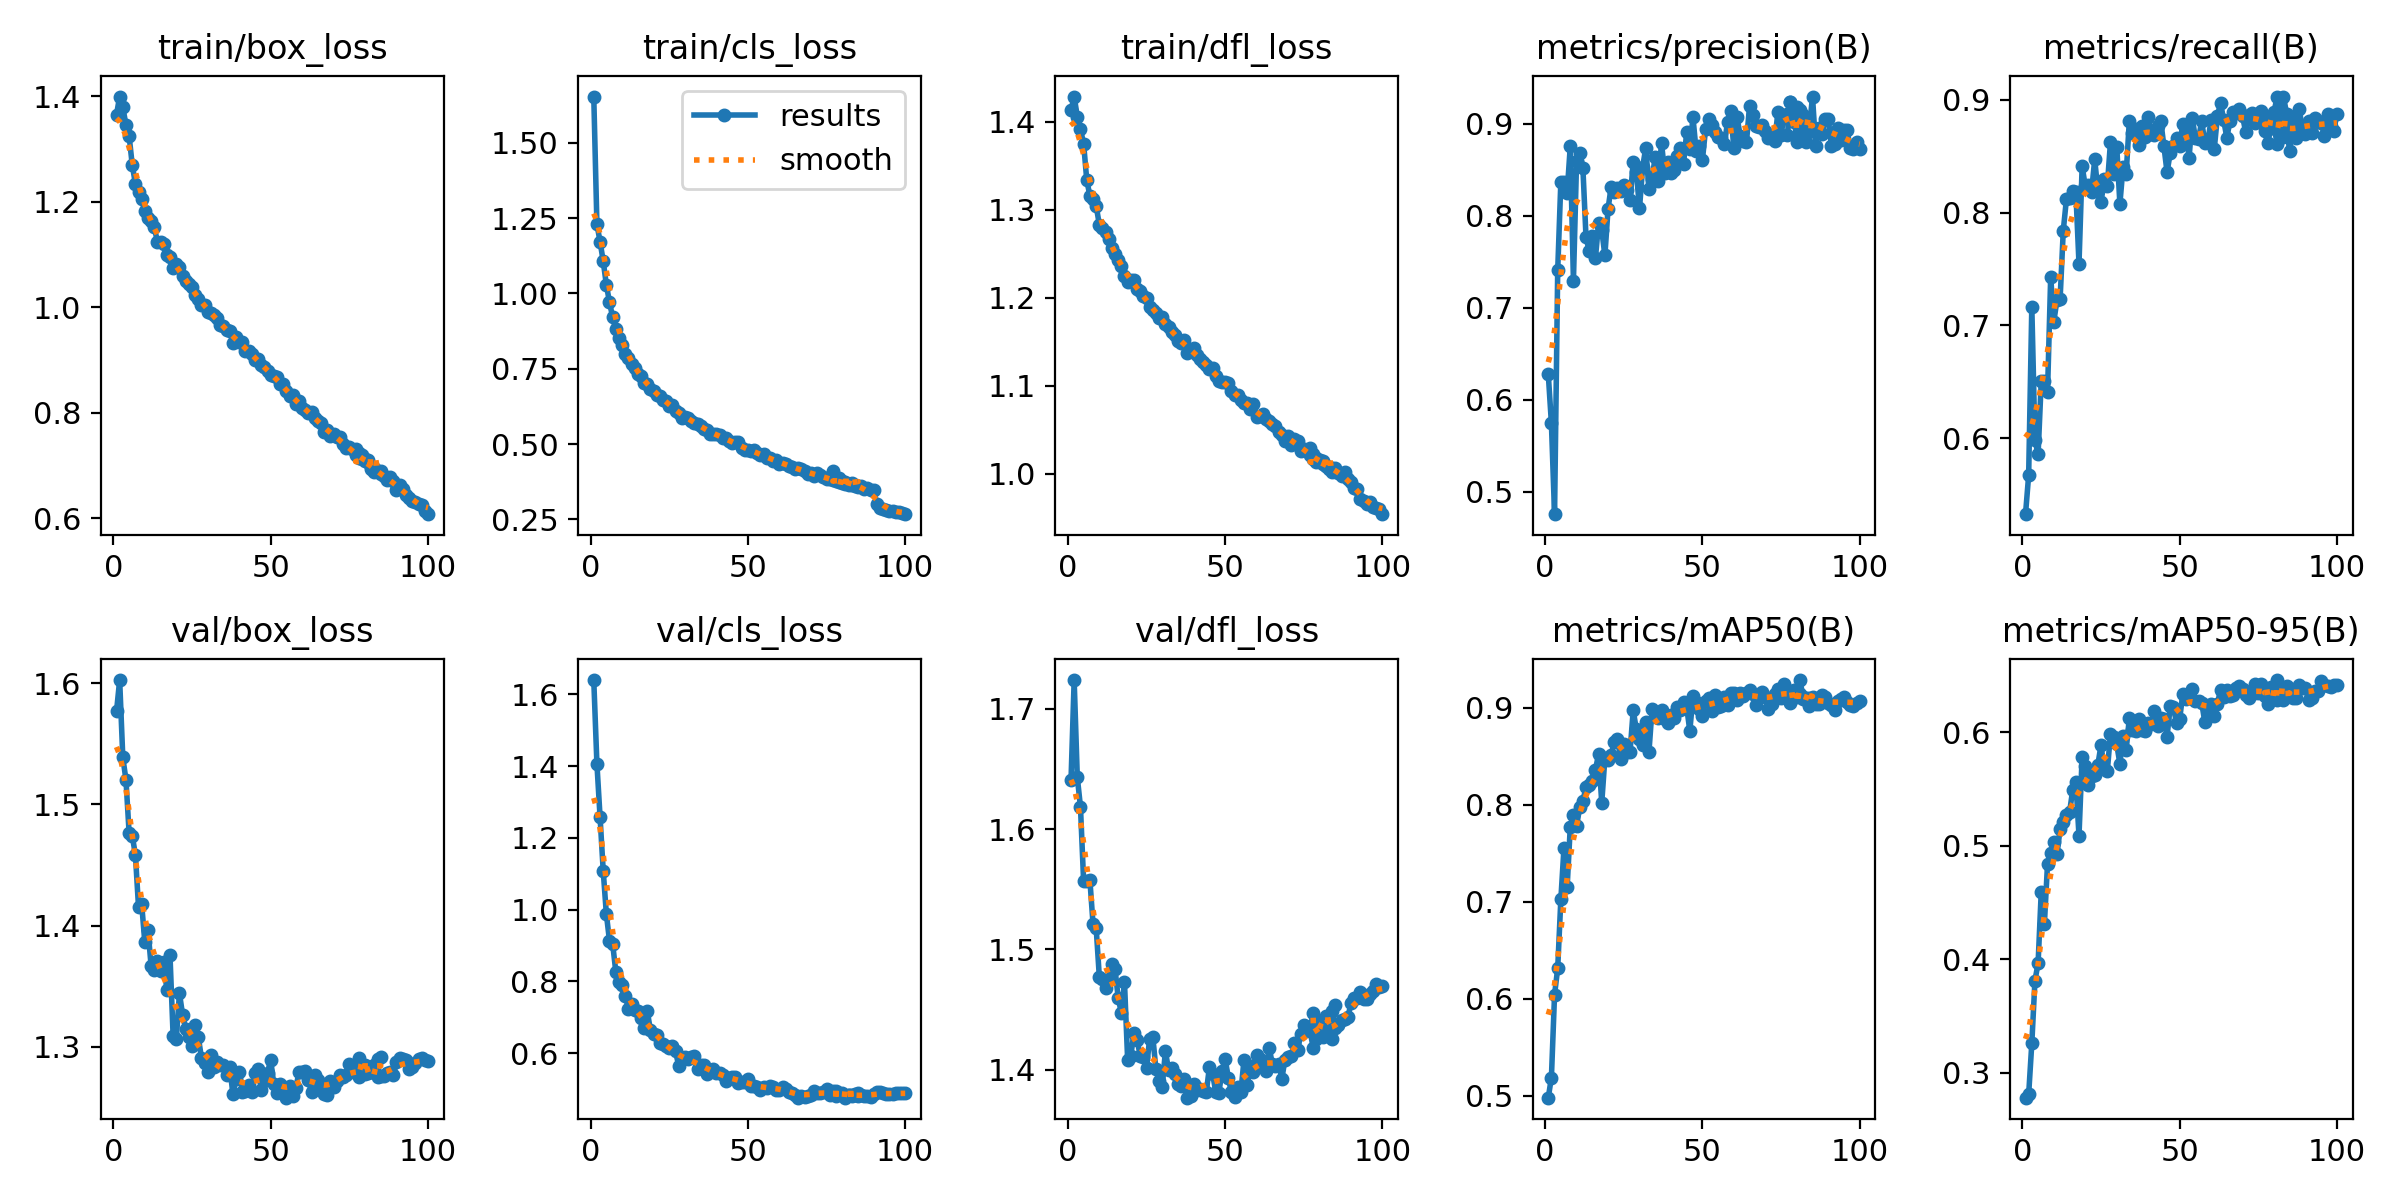

In [18]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/train/results.png",width=800)

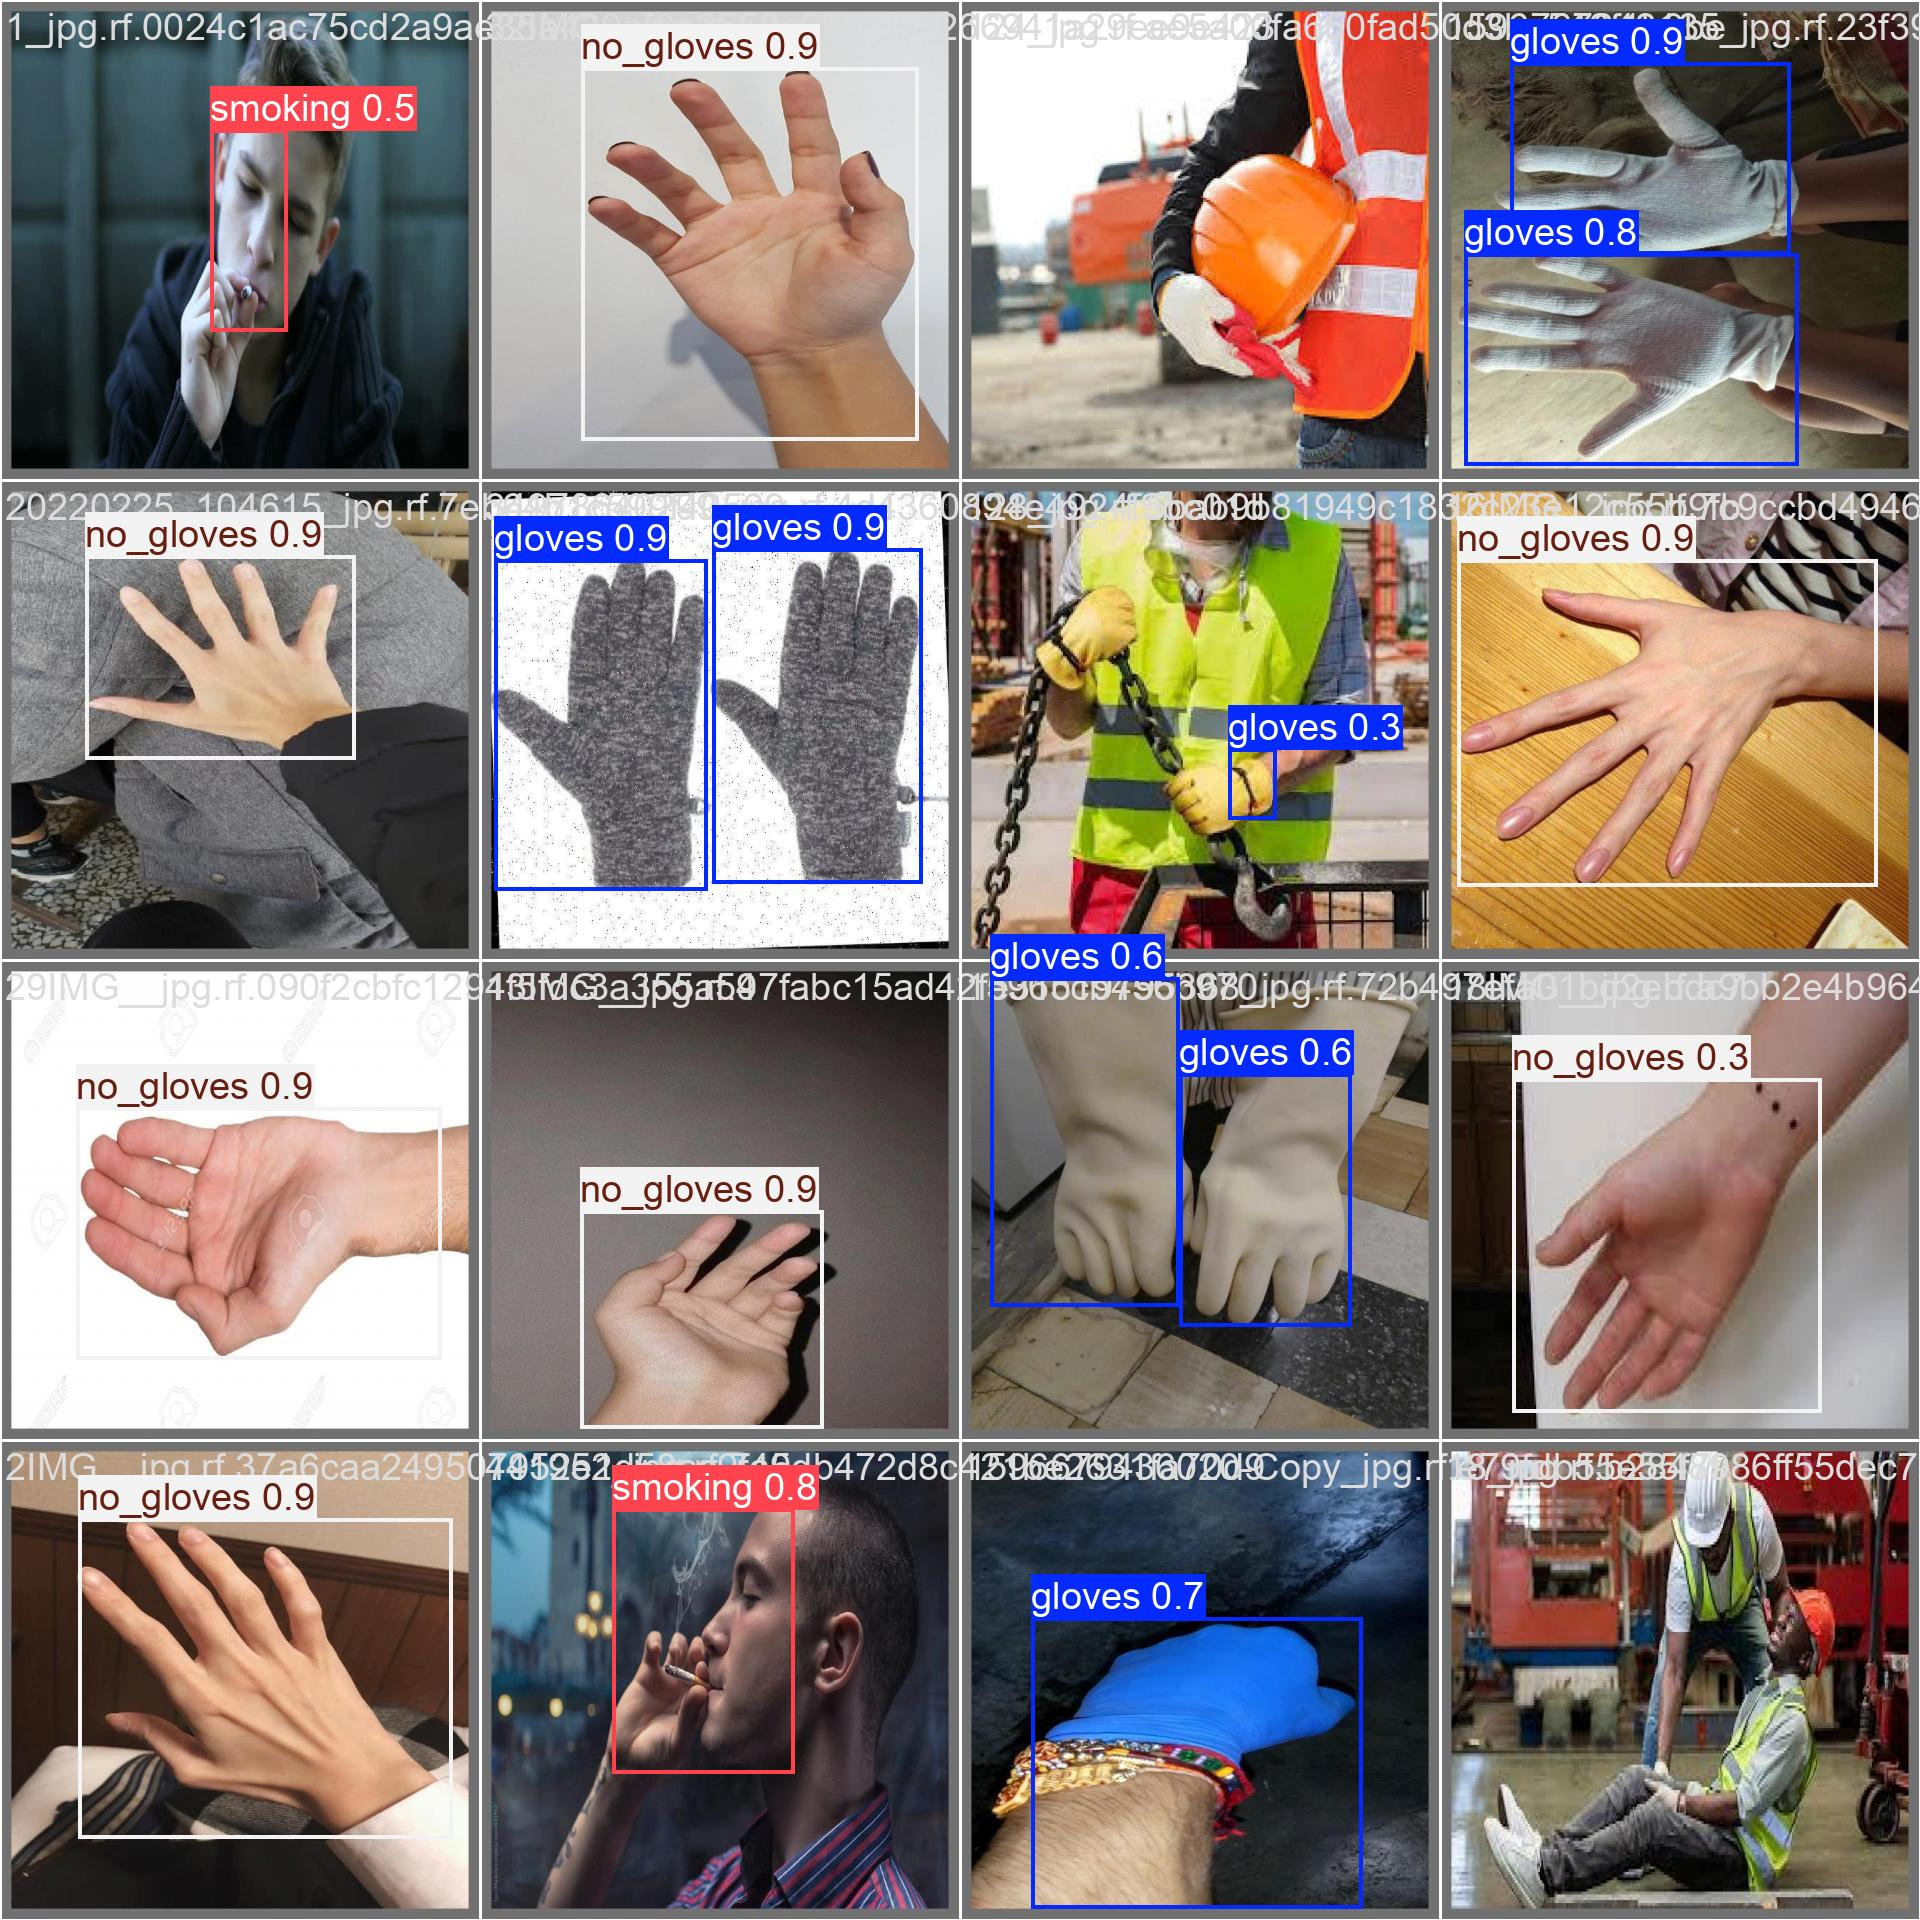

In [19]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/train/val_batch1_pred.jpg",width=800)

In [21]:
!yolo task=detect mode=val model="/content/drive/MyDrive/food-safety/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/food-safety/food-safety-2/data.yaml"

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/food-safety/food-safety-2/valid/labels.cache... 1094 images, 0 backgrounds, 0 corrupt: 100% 1094/1094 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 69/69 [00:18<00:00,  3.68it/s]
                   all       1094       2212      0.905      0.905      0.929      0.647
                gloves         83        109      0.885      0.844       0.88      0.601
               hairnet        418        826      0.948      0.965      0.983      0.643
             no_gloves         76         84      0.905      0.917       0.93      0.675
            no_hairnet        454        939      0.971      0.996      0.988      0.652
           not_smoking         13         13      0.945          1      0.995      0.804
                  

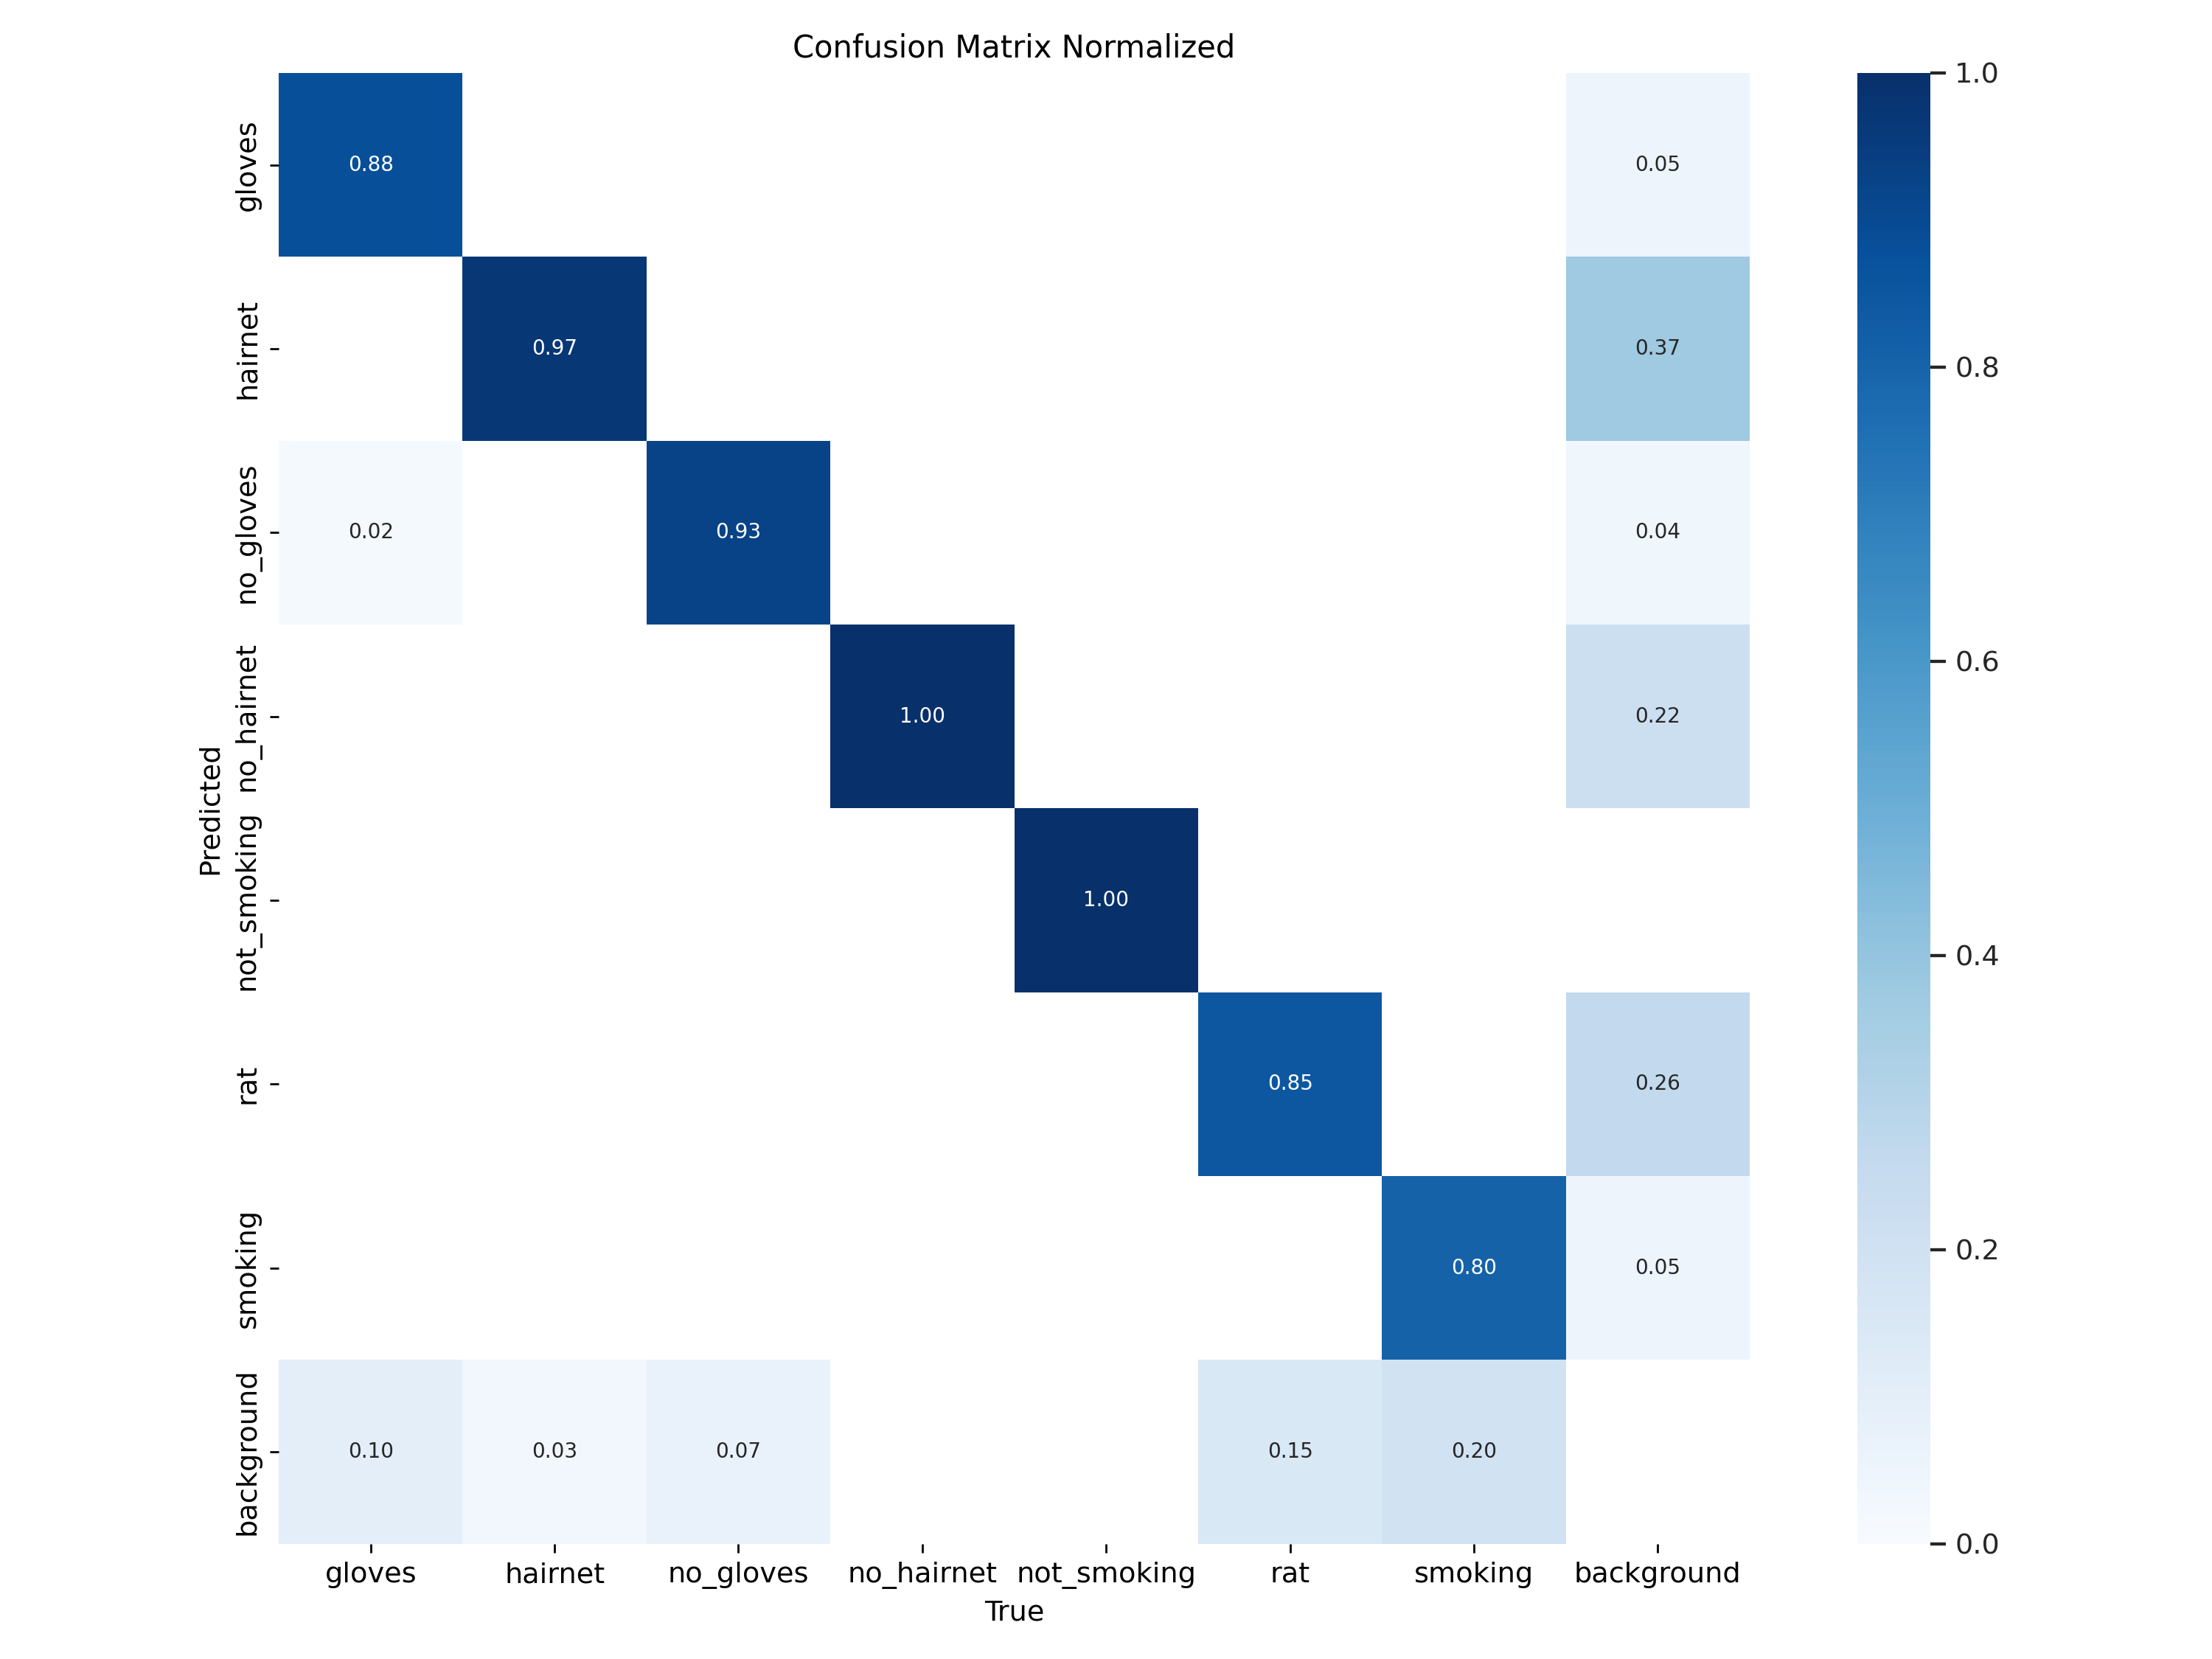

In [27]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/val2/confusion_matrix_normalized.png",width=800)

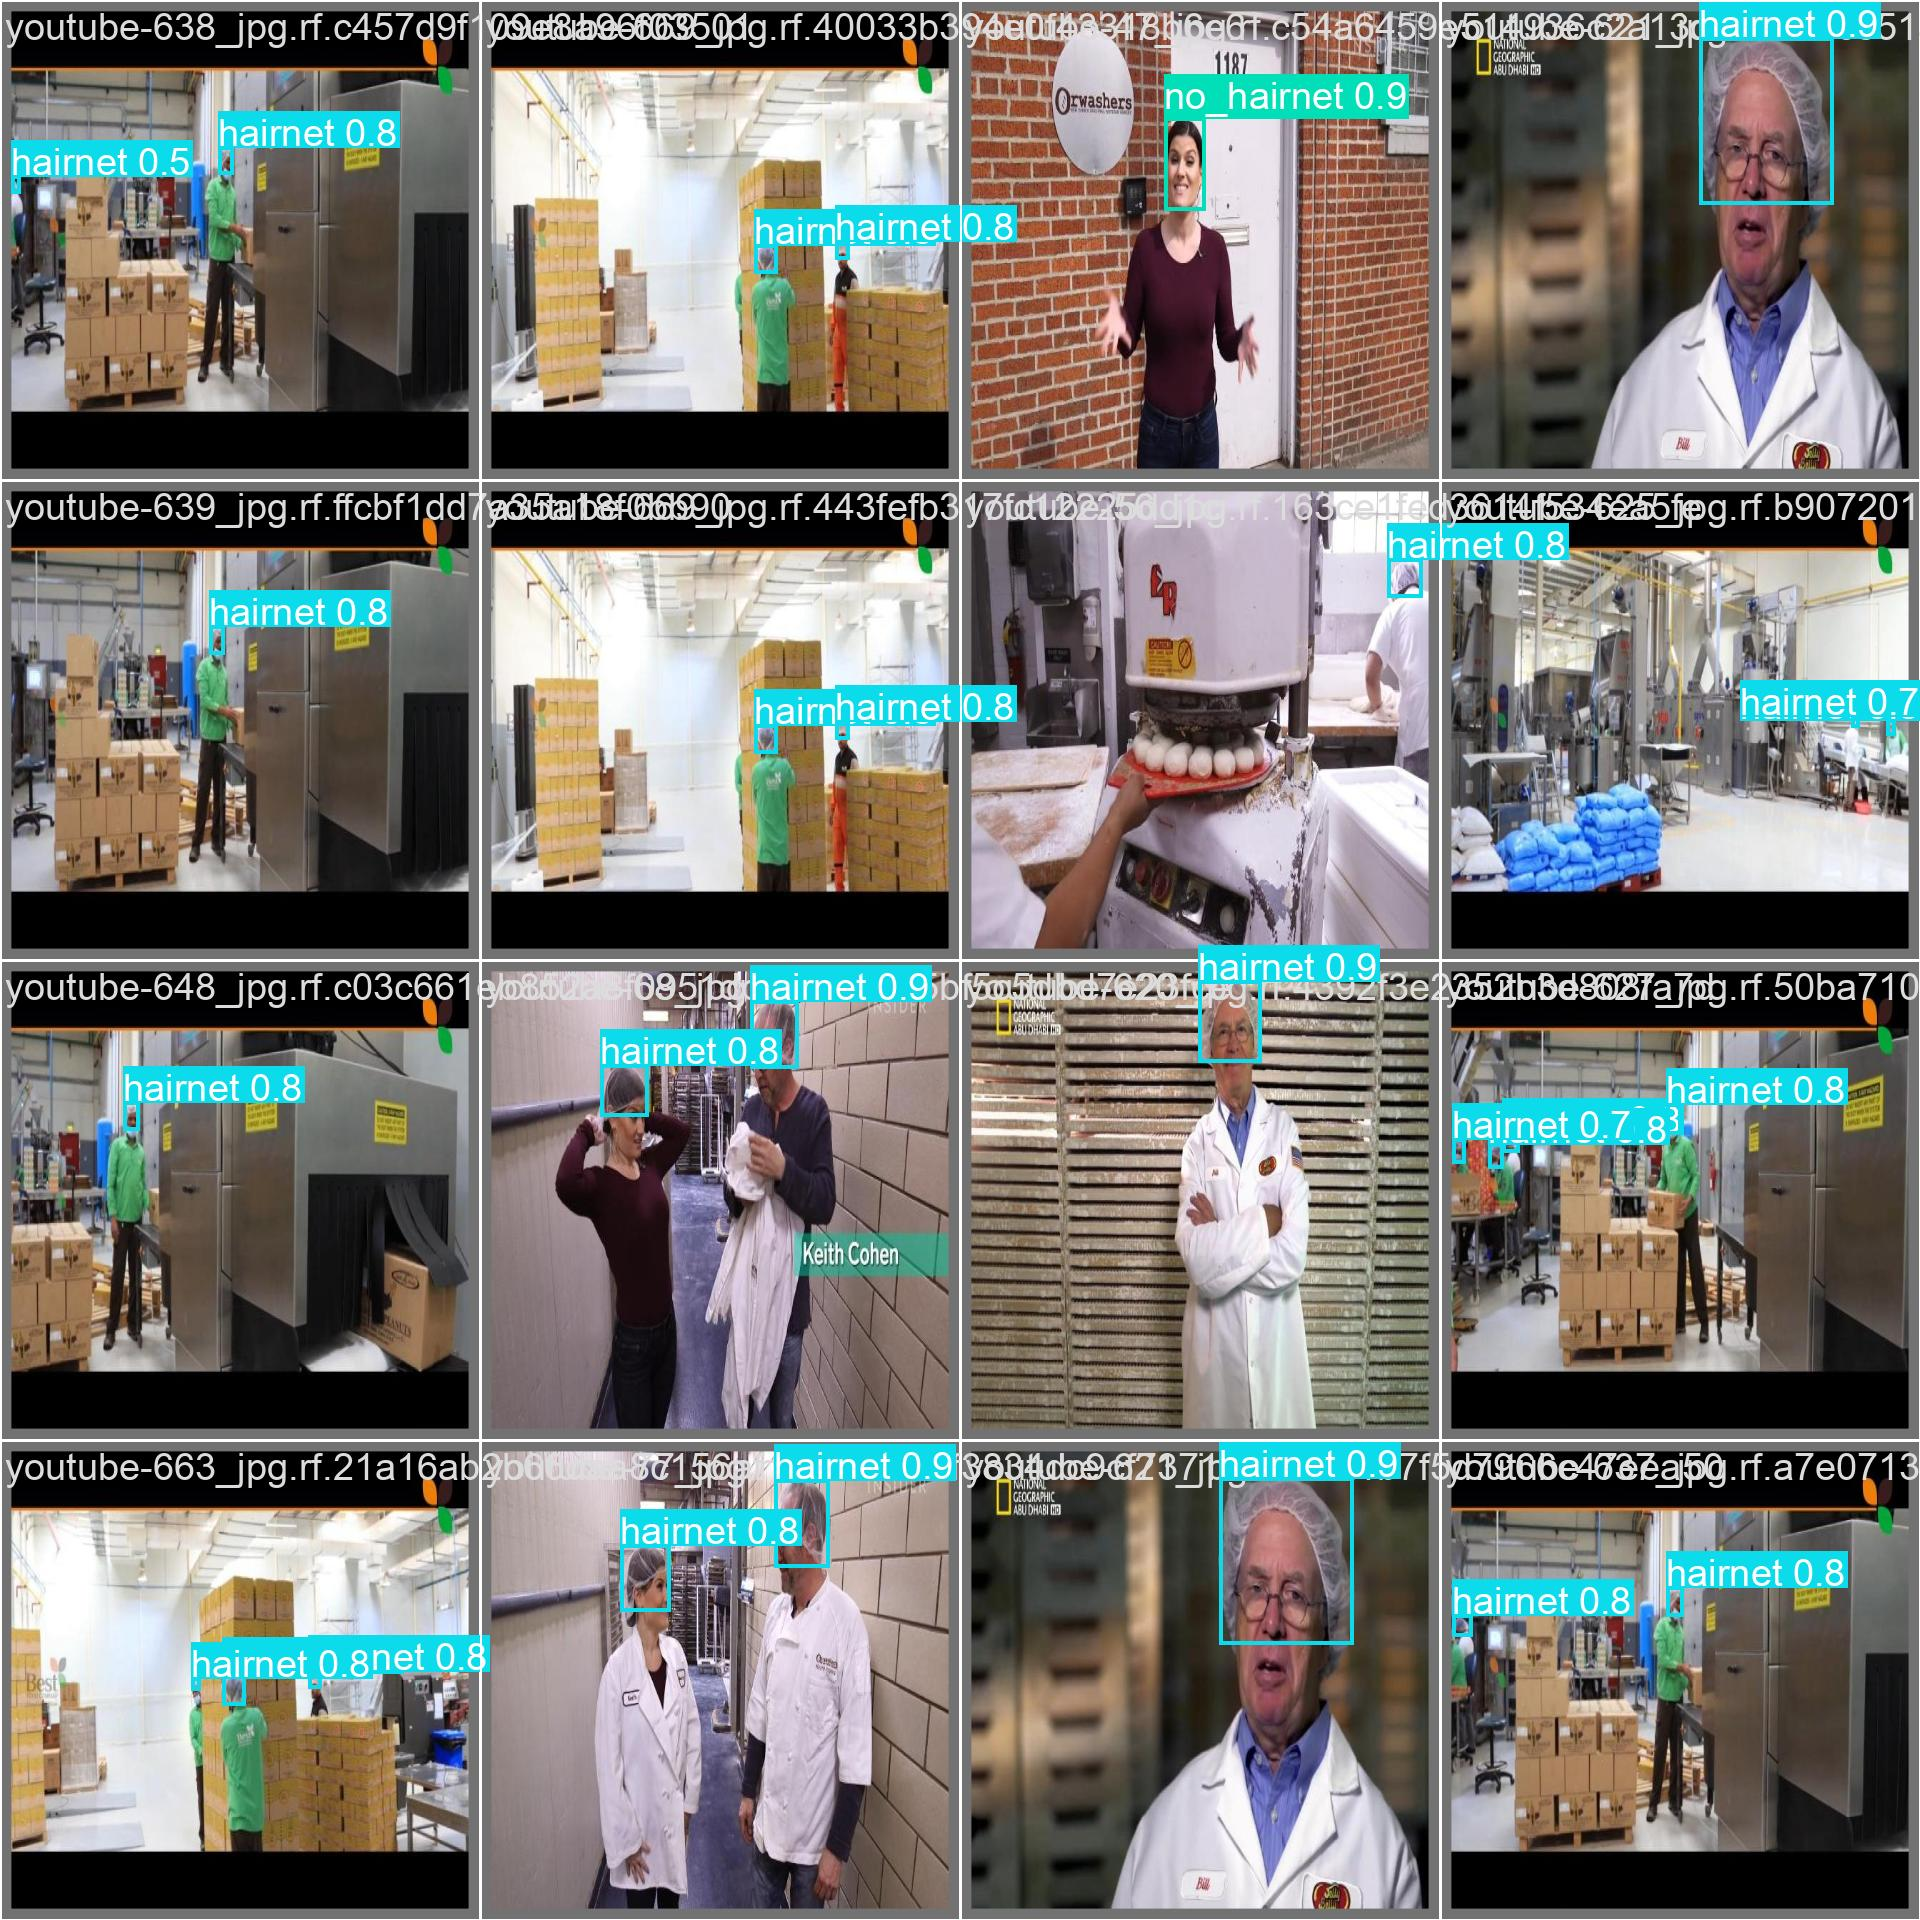

In [28]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/val2/val_batch0_pred.jpg",width=800)

In [22]:
!yolo task=detect mode=predict  model="/content/drive/MyDrive/food-safety/runs/detect/train/weights/best.pt" source = "/content/drive/MyDrive/food-safety/food-safety-2/test/images"

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs

image 1/724 /content/drive/MyDrive/food-safety/food-safety-2/test/images/0_0_anhu_0004_jpg.rf.3205a6b8b5c522aeeb9a7600fb4fa31f.jpg: 640x640 1 not_smoking, 12.0ms
image 2/724 /content/drive/MyDrive/food-safety/food-safety-2/test/images/0_0_anhu_0027_jpg.rf.99a332005d418c5462381c808da63060.jpg: 640x640 1 not_smoking, 9.9ms
image 3/724 /content/drive/MyDrive/food-safety/food-safety-2/test/images/0_0_anhu_0056_jpg.rf.aaca1d3ff07a5c108060996aaf14998b.jpg: 640x640 1 not_smoking, 9.4ms
image 4/724 /content/drive/MyDrive/food-safety/food-safety-2/test/images/0_0_baibaihe_0077_jpg.rf.70c4887a2399bd12c901be8c4d4c17cb.jpg: 640x640 1 not_smoking, 9.2ms
image 5/724 /content/drive/MyDrive/food-safety/food-safety-2/test/images/0_0_baibaihe_0093_jpg.rf.db1c19746c53b2a6fa92fcc64a7638bf.jpg: 640x640 1 not_smoking, 9.3ms
image 6/724 /conten

Predict'den rastgele örnek:



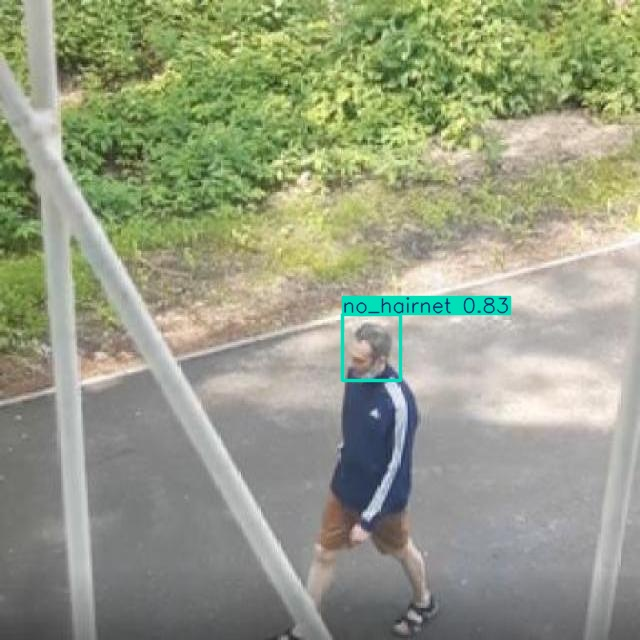

In [25]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/predict/398_png_jpg.rf.789c7e1178d17fd1aa458c883e9786ae.jpg",width=600)

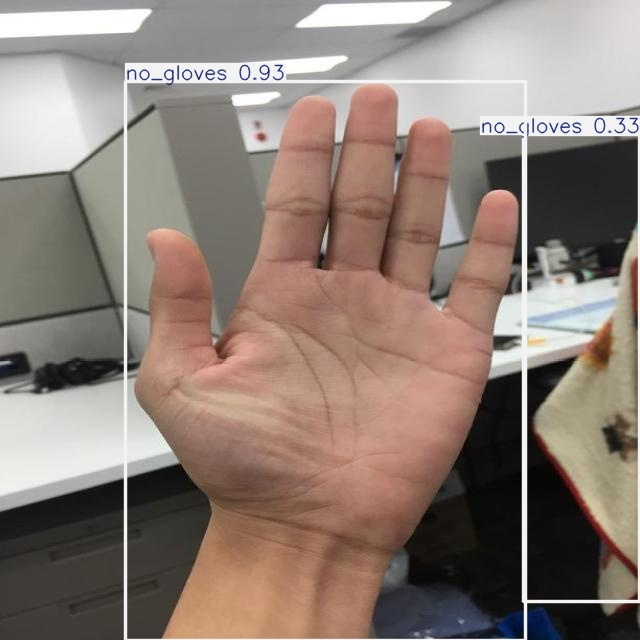

In [26]:
Image(filename="/content/drive/MyDrive/food-safety/runs/detect/predict/IMG_8345_jpg.rf.b984a4d62ff0c09c3b1f7a0ccaf0a3f2.jpg",width=600)


0: 640x640 3 hairnets, 5.6ms
1: 640x640 1 smoking, 5.6ms
Speed: 2.0ms preprocess, 5.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


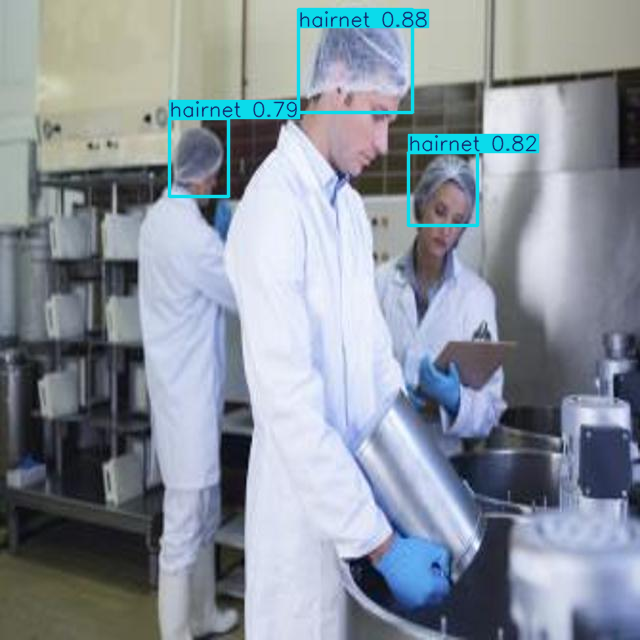

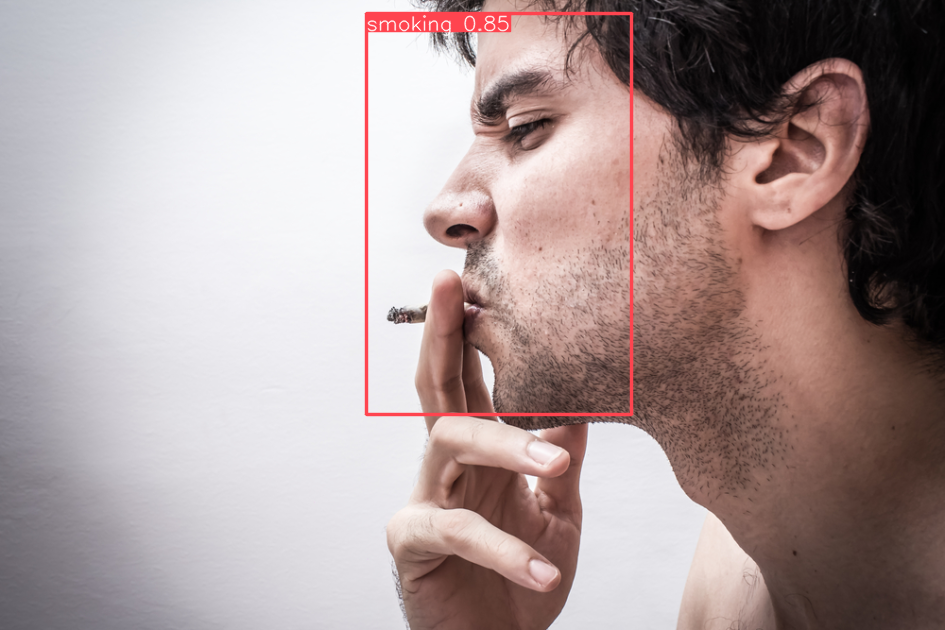

In [36]:
from PIL import Image
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/food-safety/runs/detect/train/weights/best.pt")

img_paths = ["/content/drive/MyDrive/food-safety/deneme/deneme1.jpg", "/content/drive/MyDrive/food-safety/deneme/deneme3.png"] 

results = model(img_paths) 


for i, r in enumerate(results):
    
    im_bgr = r.plot() 
    im_rgb = Image.fromarray(im_bgr[..., ::-1]) 

    r.show()
